In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd "/content/drive/MyDrive/To The Moon - From Reddit Comments to Stocks/Code/RFR"

Mounted at /content/drive
[Errno 2] No such file or directory: '/content/drive/MyDrive/To The Moon - From Reddit Comments to Stocks/Code/RFR'
/content


In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

# Change directory
%cd /content/drive/My Drive/CISC_CMPE351

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/CISC_CMPE351


In [3]:
# Imports
import pandas as pd
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt
import gc
from IPython.display import display

# Sci-kit Learn
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [4]:
# Load file
df = pd.read_csv("/content/drive/MyDrive/CISC_CMPE351/all_merged_sw (1).csv", 
                 usecols=['post_id', 'date', 'sw_17_num_comments', 'sw_17_score', 'sw_17_total_awards',
                          'author_commentkarma', 'sw_17_compound_score', 'author_id', 'author_name',
                          'ticker', 'post_type', 'adjclose_20_X', 'adjclose_19_X', 'adjclose_18_X',
                          'adjclose_17_X', 'adjclose_16_X', 'adjclose_15_X', 'adjclose_14_X', 
                          'adjclose_13_X', 'adjclose_12_X', 'adjclose_11_X', 'adjclose_10_X',
                          'adjclose_9_X', 'adjclose_8_X', 'adjclose_7_X', 'adjclose_6_X',
                          'adjclose_5_X', 'adjclose_4_X', 'adjclose_3_X', 'adjclose_2_X',
                          'adjclose_1_X', 'adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                          'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y', 'adjclose_8_Y',
                          'adjclose_9_Y', 'adjclose_10_Y', 'adjclose_11_Y', 'adjclose_12_Y',
                          'adjclose_13_Y', 'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y',
                          'adjclose_17_Y', 'adjclose_18_Y', 'adjclose_19_Y', 'adjclose_20_Y',
                          'adjclose_21_Y'])

df

,post_id,date,author_commentkarma,author_id,author_name,ticker,post_type,adjclose_20_X,adjclose_19_X,adjclose_18_X,adjclose_17_X,adjclose_16_X,adjclose_15_X,adjclose_14_X,adjclose_13_X,adjclose_12_X,adjclose_11_X,adjclose_10_X,adjclose_9_X,adjclose_8_X,adjclose_7_X,adjclose_6_X,adjclose_5_X,adjclose_4_X,adjclose_3_X,adjclose_2_X,adjclose_1_X,adjclose_2_Y,adjclose_3_Y,adjclose_4_Y,adjclose_5_Y,adjclose_6_Y,adjclose_7_Y,adjclose_8_Y,adjclose_9_Y,adjclose_10_Y,adjclose_11_Y,adjclose_12_Y,adjclose_13_Y,adjclose_14_Y,adjclose_15_Y,adjclose_16_Y,adjclose_17_Y,adjclose_18_Y,adjclose_19_Y,adjclose_20_Y,adjclose_21_Y,sw_17_num_comments,sw_17_score,sw_17_total_awards,sw_17_compound_score
0,ed1i6xt,2019-01-01,1855.0,a36tf,gundeck925,CONE,comment,52.026543,51.579323,50.899178,51.113464,49.315266,49.231415,48.467411,50.414680,50.787373,49.864975,50.628979,50.535812,50.843269,51.076195,51.495464,51.365028,51.961319,52.138344,51.691128,50.321518,46.610138,47.982403,48.602737,49.740036,47.268070,48.790726,49.016304,48.593346,48.828323,48.865921,48.734329,49.016304,48.236179,46.995499,47.221077,46.967300,49.223080,49.345276,50.144196,50.943123,2.000000,9.000000,0.000000,0.202300
1,ed0rsq9,2019-01-01,8101.0,54sdn,turbotoast,CACC,comment,410.399994,412.209991,403.850006,407.559998,402.260010,401.640015,394.000000,405.670013,422.100006,418.700012,414.880005,411.429993,410.630005,422.489990,425.000000,422.890015,416.989990,418.190002,423.570007,424.119995,395.029999,408.260010,406.559998,410.619995,410.309998,415.850006,422.600006,420.929993,413.359985,416.309998,421.739990,429.119995,424.959991,420.950012,405.570007,409.929993,411.890015,408.670013,414.369995,398.019989,1.000000,3.000000,0.000000,0.458800
2,ed149cc,2019-01-01,234162.0,6lvmmbl,Shmokesshweed,WSBC,comment,38.873425,39.189323,38.214558,38.683891,38.115276,38.187477,38.061119,38.268715,38.377018,38.286758,37.330048,37.781326,37.573742,37.727173,38.115276,37.799374,37.582760,37.212711,37.095379,36.598965,33.853710,34.880959,34.944592,35.153675,35.180950,35.135498,34.962769,34.917316,35.162773,35.871841,36.108204,36.135464,35.799118,35.417305,35.771847,36.090015,36.171829,37.799068,37.862701,36.917271,9.400000,9.800000,0.000000,-0.082100
3,ed0rg2j,2019-01-01,744.0,2dk1wq99,nightman_123,WSBC,comment,38.873425,39.189323,38.214558,38.683891,38.115276,38.187477,38.061119,38.268715,38.377018,38.286758,37.330048,37.781326,37.573742,37.727173,38.115276,37.799374,37.582760,37.212711,37.095379,36.598965,33.853710,34.880959,34.944592,35.153675,35.180950,35.135498,34.962769,34.917316,35.162773,35.871841,36.108204,36.135464,35.799118,35.417305,35.771847,36.090015,36.171829,37.799068,37.862701,36.917271,9.400000,9.800000,0.000000,-0.082100
4,abjmvm,2019-01-01,744.0,2dk1wq99,nightman_123,WSBC,submission,38.873425,39.189323,38.214558,38.683891,38.115276,38.187477,38.061119,38.268715,38.377018,38.286758,37.330048,37.781326,37.573742,37.727173,38.115276,37.799374,37.582760,37.212711,37.095379,36.598965,33.853710,34.880959,34.944592,35.153675,35.180950,35.135498,34.962769,34.917316,35.162773,35.871841,36.108204,36.135464,35.799118,35.417305,35.771847,36.090015,36.171829,37.799068,37.862701,36.917271,9.400000,9.800000,0.000000,-0.082100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940780,ghmym1x,2020-12-31,4431.0,vh0ilgz,MerganzerMunson,ADES,comment,5.650000,6.020000,5.830000,6.150000,5.700000,5.500000,5.260000,5.240000,5.240000,5.170000,4.980000,4.880000,4.980000,4.940000,4.720000,4.500000,4.580000,4.510000,4.600000,4.560000,5.370000,5.450000,5.560000,5.570000,5.490000,5.330000,5.530000,5.400000,5.520000,5.500000,5.420000,5.450000,5.330000,5.380000,5.440000,5.500000,5.250000,5.190000,5.070000,5.120000,4.721311,16.737705,0.622951,0.060048
940781,ghmym1x,2020-12-31,4431.0,vh0ilgz,MerganzerMunson,JAN,comment,4.270000,4.500000,4.620000,4.510000,4.5

In [5]:
# Print the colum names
df.columns.values

array(['post_id', 'date', 'author_commentkarma', 'author_id',
       'author_name', 'ticker', 'post_type', 'adjclose_20_X',
       'adjclose_19_X', 'adjclose_18_X', 'adjclose_17_X', 'adjclose_16_X',
       'adjclose_15_X', 'adjclose_14_X', 'adjclose_13_X', 'adjclose_12_X',
       'adjclose_11_X', 'adjclose_10_X', 'adjclose_9_X', 'adjclose_8_X',
       'adjclose_7_X', 'adjclose_6_X', 'adjclose_5_X', 'adjclose_4_X',
       'adjclose_3_X', 'adjclose_2_X', 'adjclose_1_X', 'adjclose_2_Y',
       'adjclose_3_Y', 'adjclose_4_Y', 'adjclose_5_Y', 'adjclose_6_Y',
       'adjclose_7_Y', 'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
       'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y', 'adjclose_14_Y',
       'adjclose_15_Y', 'adjclose_16_Y', 'adjclose_17_Y', 'adjclose_18_Y',
       'adjclose_19_Y', 'adjclose_20_Y', 'adjclose_21_Y',
       'sw_17_num_comments', 'sw_17_score', 'sw_17_total_awards',
       'sw_17_compound_score'], dtype=object)

In [6]:
# Find the min and max at 1-4 business week intervals
df['5day_min'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y']].idxmin(axis=1)

df['10day_min'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y',
                      'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                      'adjclose_11_Y']].idxmin(axis=1)

df['15day_min'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y',
                      'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                      'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y',
                      'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y']].idxmin(axis=1)

df['20day_min'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y',
                      'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                      'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y',
                      'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y',
                      'adjclose_17_Y', 'adjclose_18_Y', 'adjclose_19_Y',
                      'adjclose_20_Y', 'adjclose_21_Y']].idxmin(axis=1)

df['5day_max'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y']].idxmax(axis=1)

df['10day_max'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y',
                      'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                      'adjclose_11_Y']].idxmax(axis=1)

df['15day_max'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y',
                      'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                      'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y',
                      'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y']].idxmax(axis=1)

df['20day_max'] = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y',
                     'adjclose_5_Y', 'adjclose_6_Y', 'adjclose_7_Y',
                      'adjclose_8_Y', 'adjclose_9_Y', 'adjclose_10_Y',
                      'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y',
                      'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y',
                      'adjclose_17_Y', 'adjclose_18_Y', 'adjclose_19_Y',
                      'adjclose_20_Y', 'adjclose_21_Y']].idxmax(axis=1)

# Extract the day number and convert to int
df['5day_min'] = df['5day_min'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['10day_min'] = df['10day_min'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['15day_min'] = df['15day_min'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['20day_min'] = df['20day_min'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['5day_max'] = df['5day_max'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['10day_max'] = df['10day_max'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['15day_max'] = df['15day_max'].str.replace(r'[^0-9]+', '', regex=True).astype(int)
df['20day_max'] = df['20day_max'].str.replace(r'[^0-9]+', '', regex=True).astype(int)

In [7]:
# Get the X-variable columns
df_X = df[['sw_17_num_comments', 'sw_17_score', 'sw_17_total_awards', 'author_commentkarma',
           'sw_17_compound_score', 'adjclose_20_X', 'adjclose_19_X', 'adjclose_18_X',
           'adjclose_17_X', 'adjclose_16_X', 'adjclose_15_X', 'adjclose_14_X',
           'adjclose_13_X', 'adjclose_12_X', 'adjclose_11_X', 'adjclose_10_X',
           'adjclose_9_X', 'adjclose_8_X', 'adjclose_7_X', 'adjclose_6_X',
           'adjclose_5_X', 'adjclose_4_X', 'adjclose_3_X', 'adjclose_2_X',
           'adjclose_1_X']].to_numpy()

# Get the Y-variable columns
df_Y = df[['adjclose_2_Y', 'adjclose_3_Y', 'adjclose_4_Y', 'adjclose_5_Y',
           'adjclose_6_Y', 'adjclose_7_Y', 'adjclose_8_Y', 'adjclose_9_Y',
           'adjclose_10_Y', 'adjclose_11_Y', 'adjclose_12_Y', 'adjclose_13_Y',
           'adjclose_14_Y', 'adjclose_15_Y', 'adjclose_16_Y', 'adjclose_17_Y',
           'adjclose_18_Y', 'adjclose_19_Y', 'adjclose_20_Y', 'adjclose_21_Y',
           '5day_min', '10day_min', '15day_min', '20day_min', '5day_max',
           '10day_max', '15day_max', '20day_max']].to_numpy()

# Clear up memory
del df
gc.collect()

# Get 80% of the data by date
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.2,
                                                    shuffle=False)

# Print
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[2.00000000e+00 9.00000000e+00 0.00000000e+00 ... 5.21383438e+01
  5.16911278e+01 5.03215179e+01]
 [1.00000000e+00 3.00000000e+00 0.00000000e+00 ... 4.18190002e+02
  4.23570007e+02 4.24119995e+02]
 [9.40000000e+00 9.80000000e+00 0.00000000e+00 ... 3.72127113e+01
  3.70953789e+01 3.65989647e+01]
 ...
 [3.00829876e+00 2.31286307e+01 4.56431535e-02 ... 1.28885635e+02
  1.27827332e+02 1.28855957e+02]
 [3.90967742e+00 1.30451613e+01 2.58064516e-02 ... 2.11000004e+01
  2.15900002e+01 2.43500004e+01]
 [1.86666667e+01 8.53333333e+01 1.00000000e+00 ... 7.15000010e+00
  7.07999992e+00 6.69999981e+00]]
[[2.70909091e+00 6.98181818e+00 3.63636364e-02 ... 4.40999985e+00
  4.36000013e+00 4.34999990e+00]
 [5.62421938e+01 3.16904190e+01 8.17987724e-02 ... 2.17674332e+01
  2.21154022e+01 2.18834248e+01]
 [2.40000000e+00 1.08000000e+01 0.00000000e+00 ... 2.04999995e+00
  2.05999994e+00 2.10999990e+00]
 ...
 [3.78339350e+00 2.39819495e+01 1.51624549e-01 ... 1.48100004e+01
  1.42700005e+01 1.36300001e+01]

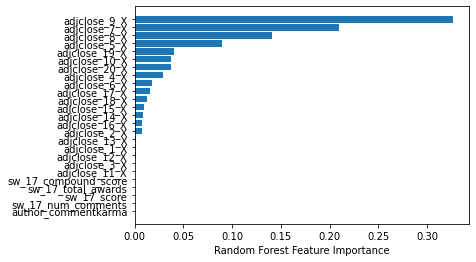

In [8]:
# Initialize Model
RFRegressor = RandomForestRegressor(bootstrap=False, criterion='mse',
                                    max_depth=6, max_leaf_nodes=None, max_features=0.33,
                                    min_impurity_decrease=0.0, min_impurity_split=None,
                                    n_estimators=400, n_jobs=None, oob_score=False,
                                    random_state=1, verbose=0, warm_start=False) 

# Train
RFRegressor.fit(X_train,y_train)

# Feature importance
cols = ['sw_17_num_comments', 'sw_17_score', 'sw_17_total_awards',
        'author_commentkarma', 'sw_17_compound_score', 'adjclose_20_X',
        'adjclose_19_X', 'adjclose_18_X', 'adjclose_17_X', 'adjclose_16_X',
        'adjclose_15_X', 'adjclose_14_X', 'adjclose_13_X', 'adjclose_12_X',
        'adjclose_11_X', 'adjclose_10_X', 'adjclose_9_X', 'adjclose_8_X',
        'adjclose_7_X', 'adjclose_6_X', 'adjclose_5_X', 'adjclose_4_X',
        'adjclose_3_X', 'adjclose_2_X', 'adjclose_1_X']
sorted_idx = RFRegressor.feature_importances_.argsort()
plt.barh([cols[i] for i in sorted_idx], RFRegressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

# Predict
ypred = RFRegressor.predict(X_test)

In [9]:
# Evaluate RMSE
# On Google Colab, the squared=False parameter doesn't work
rmse = mean_squared_error(y_test, ypred, multioutput='raw_values', squared=False)

# For each value in rmse
for i in range(1, len(rmse)+1):

    # Print the RMSE values for adjClose
    if i < 21:
        print("The RMSE for adjClose_{}_Y = ".format(i+1), rmse[i-1]**0.5)

    # Print the RMSE values for min day
    elif 21 <= i < 25:
        print("The RMSE for {}day_min = ".format((i-20)*5), rmse[i-1]**0.5)

    # Print the RMSE for max day
    else:
        print("The RMSE for {}day_max = ".format((i-24)*5), rmse[i-1]**0.5)

The RMSE for adjClose_2_Y =  38.65892235540846
The RMSE for adjClose_3_Y =  38.53103918641668
The RMSE for adjClose_4_Y =  39.61661838400732
The RMSE for adjClose_5_Y =  41.03863041295972
The RMSE for adjClose_6_Y =  42.86116925645356
The RMSE for adjClose_7_Y =  44.310714479133125
The RMSE for adjClose_8_Y =  45.922986043070786
The RMSE for adjClose_9_Y =  48.75252552678694
The RMSE for adjClose_10_Y =  49.18695789894845
The RMSE for adjClose_11_Y =  50.965936947309814
The RMSE for adjClose_12_Y =  52.998622434954214
The RMSE for adjClose_13_Y =  55.63387450064955
The RMSE for adjClose_14_Y =  56.387389844974976
The RMSE for adjClose_15_Y =  59.396004163524374
The RMSE for adjClose_16_Y =  60.28579526565854
The RMSE for adjClose_17_Y =  61.73292847637932
The RMSE for adjClose_18_Y =  62.570119495451785
The RMSE for adjClose_19_Y =  63.33024404710161
The RMSE for adjClose_20_Y =  63.9446177598289
The RMSE for adjClose_21_Y =  64.89153671238395
The RMSE for 5day_min =  1.553069356989362

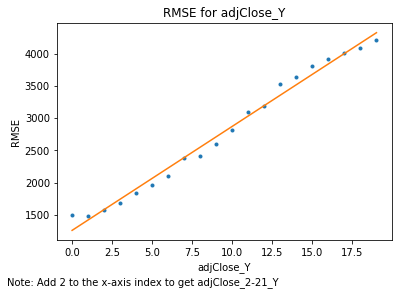

In [10]:
# Plot the RMSE for adjClose
x = np.arange(20)
y = rmse[0:20]

# Fit with polyfit
b, m = polyfit(x, y, 1)

# Add title and axis names
plt.title('RMSE for adjClose_Y')
plt.xlabel('adjClose_Y')
plt.ylabel('RMSE')

# Add a footnote below and to the left side of the chart
plt.figtext(0.01, -0.03,
            'Note: Add 2 to the x-axis index to get adjClose_2-21_Y',
            horizontalalignment='left')

plt.plot(x, y, '.')
plt.plot(x, m*x+b, '-')
plt.show()

In [11]:
# Evaluate MAE
mae = mean_absolute_error(y_test, ypred, multioutput='raw_values')

# For each value in mae
for i in range(1, len(mae)+1):

    # Print the MAE values for adjClose
    if i < 21:
        print("The MAE for adjClose_{}_Y = ".format(i+1), mae[i-1])

    # Print the MAE values for min day
    elif 21 <= i < 25:
        print("The MAE for {}day_min = ".format((i-20)*5), mae[i-1])

    # Print the MAE for max day
    else:
        print("The MAE for {}day_max = ".format((i-24)*5), mae[i-1])

The MAE for adjClose_2_Y =  15.04839114632527
The MAE for adjClose_3_Y =  14.996698210239193
The MAE for adjClose_4_Y =  15.32731739816632
The MAE for adjClose_5_Y =  15.683624742080221
The MAE for adjClose_6_Y =  16.18108247938312
The MAE for adjClose_7_Y =  16.70458479128175
The MAE for adjClose_8_Y =  17.13914174176419
The MAE for adjClose_9_Y =  17.798485275892126
The MAE for adjClose_10_Y =  18.11554580133555
The MAE for adjClose_11_Y =  18.570261696005122
The MAE for adjClose_12_Y =  19.09104832244485
The MAE for adjClose_13_Y =  19.734151737163636
The MAE for adjClose_14_Y =  20.0103263200271
The MAE for adjClose_15_Y =  21.07285480776516
The MAE for adjClose_16_Y =  21.38098491999497
The MAE for adjClose_17_Y =  21.888791761233712
The MAE for adjClose_18_Y =  22.08609781919711
The MAE for adjClose_19_Y =  22.255839737982242
The MAE for adjClose_20_Y =  22.454502263963686
The MAE for adjClose_21_Y =  22.664463382793716
The MAE for 5day_min =  1.3854944904835305
The MAE for 10day

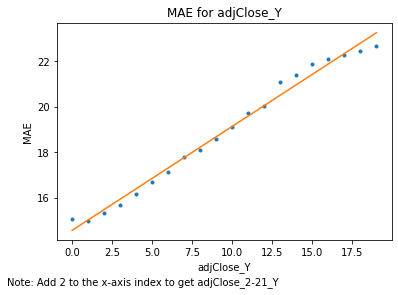

In [12]:
# Plot the MAE for adjClose
x = np.arange(20)
y = mae[0:20]

# Fit with polyfit
b, m = polyfit(x, y, 1)

# Add title and axis names
plt.title('MAE for adjClose_Y')
plt.xlabel('adjClose_Y')
plt.ylabel('MAE')

# Add a footnote below and to the left side of the chart
plt.figtext(0.01, -0.03,
            'Note: Add 2 to the x-axis index to get adjClose_2-21_Y',
            horizontalalignment='left')

plt.plot(x, y, '.')
plt.plot(x, m*x+b, '-')
plt.show()